In [1]:
	
!pip install kaggle
from google.colab import files
files.upload() # upload the kaggle.json file (api token)

#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json
# !your dataset api command
!kaggle datasets download -d ankurbajaj9/obesity-levels

from zipfile import ZipFile
file_name = 'obesity-levels.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (3).json
obesity-levels.zip: Skipping, found more recently modified local copy (use --force to force download)
Done


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Q-2. Imagine you have a dataset where you have different features like Age ,Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.

In [3]:
df= pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df['bmi']= df['Weight']/ (df['Height']**2) # bmi= weight (kg) / [height (m)]^2

We will use bmi for our model and drop height and weight columns, since they are directly correlated to bmi.

In [5]:
df=df.drop(['Height', 'Weight'],axis=1)

In [6]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,bmi
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [7]:
bins = [0, 18.5, 24.9, 29.9, 35, np.inf]
names = ['Underweight', 'Normal', 'Overweight', 'Obesity', 'ExtremeObesity']

df['weight_catagory'] = pd.cut(df['bmi'], bins, labels=names)
# creating a new column for weight_status for catagorization

In [8]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,bmi,weight_catagory
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,Normal
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Normal
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,Normal
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,Overweight
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Overweight


In [9]:
df.shape

(2111, 17)

In [10]:
df.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad', 'bmi', 'weight_catagory'],
      dtype='object')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.000000,19.947192,22.777890,26.000000,61.000000
FCVC,2111.0,2.419043,0.533927,1.000000,2.000000,2.385502,3.000000,3.000000
NCP,2111.0,2.685628,0.778039,1.000000,2.658738,3.000000,3.000000,4.000000
CH2O,2111.0,2.008011,0.612953,1.000000,1.584812,2.000000,2.477420,3.000000
FAF,2111.0,1.010298,0.850592,0.000000,0.124505,1.000000,1.666678,3.000000
TUE,2111.0,0.657866,0.608927,0.000000,0.000000,0.625350,1.000000,2.000000
bmi,2111.0,29.700159,8.011337,12.998685,24.325802,28.719089,36.016501,50.811753


In [12]:
df.isnull().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
bmi                               0
weight_catagory                   0
dtype: int64

In [13]:
df.dtypes

Gender                              object
Age                                float64
family_history_with_overweight      object
FAVC                                object
FCVC                               float64
NCP                                float64
CAEC                                object
SMOKE                               object
CH2O                               float64
SCC                                 object
FAF                                float64
TUE                                float64
CALC                                object
MTRANS                              object
NObeyesdad                          object
bmi                                float64
weight_catagory                   category
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   object  
 1   Age                             2111 non-null   float64 
 2   family_history_with_overweight  2111 non-null   object  
 3   FAVC                            2111 non-null   object  
 4   FCVC                            2111 non-null   float64 
 5   NCP                             2111 non-null   float64 
 6   CAEC                            2111 non-null   object  
 7   SMOKE                           2111 non-null   object  
 8   CH2O                            2111 non-null   float64 
 9   SCC                             2111 non-null   object  
 10  FAF                             2111 non-null   float64 
 11  TUE                             2111 non-null   float64 
 12  CALC                

In [15]:
#for col in df.columns[df.dtypes==object]:
#  df[col] = df[col].astype('category')

In [16]:
#df[df.select_dtypes(['object']).columns]=df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

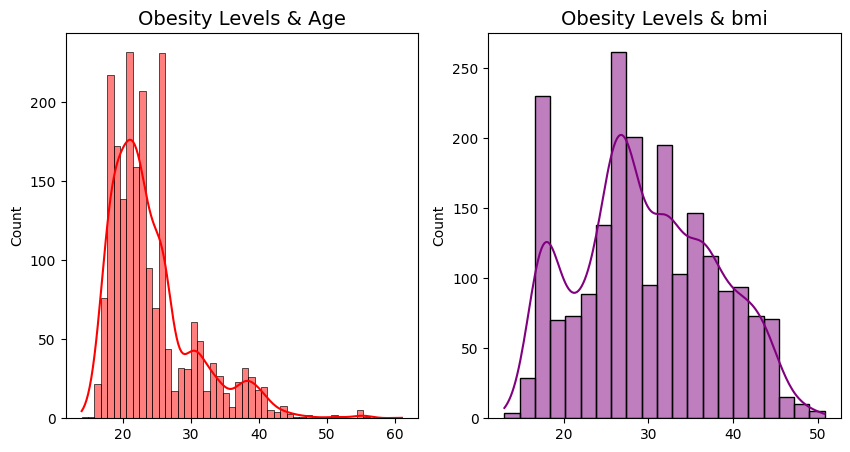

In [17]:
fig , ax = plt.subplots(1,2,figsize = (10,5))

Age = df.Age.values
#Height= df.Height.values
#Weight = df.Weight.values
bmi= df.bmi.values
sns.histplot(Age , ax = ax[0] , color = 'red', kde= True).set_title('Obesity Levels & Age' , fontsize = 14)
#sns.histplot(Height , ax = ax[1] , color = 'green', kde= True).set_title('Obesity Levels & Height' , fontsize = 14)
#sns.histplot(Weight , ax = ax[2] , color = 'purple', kde= True).set_title('Obesity Levels & Weight' , fontsize = 14)
sns.histplot(bmi , ax = ax[1] , color = 'purple', kde= True).set_title('Obesity Levels & bmi' , fontsize = 14)


plt.show()

### Data preperation for modeling

In [18]:
df_prep = df.copy()


In [19]:
## Independent and dependent features
X = df_prep.drop(labels=['weight_catagory'],axis=1)
Y = df_prep[['weight_catagory']]

In [20]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns
target_col = Y.select_dtypes(include='category').columns
# select numerical and catagorical datas

In [21]:
categorical_cols

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [22]:
numerical_cols

Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'bmi'], dtype='object')

In [23]:
target_col

Index(['weight_catagory'], dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
#target_categories= ['Underweight', 'Normal', 'Overweight', 'Obesity', 'ExtremeObesity']

In [ ]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('onehotencoder',OneHotEncoder(handle_unknown='ignore'))
    ]

)
'''
# target pipeline
target_pipeline=Pipeline(
    steps=[
    ('ordinalencoder',OrdinalEncoder(categories= [target_categories])),
    ('scaler',StandardScaler())
    ]

)
'''
# combine numerical and catagorical pipeline
preprocessor=ColumnTransformer(
    transformers=[
  ('num_pipeline',num_pipeline,numerical_cols),
  ('cat_pipeline',cat_pipeline,categorical_cols),
])
'''
preprocessor_target= ColumnTransformer(
    transformers=[
    ('target_pipeline', target_pipeline, target_col)
    
]
    
)
'''

In [29]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.10,random_state=30)

In [30]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
# fit_transform training data, only transform for test data & convert to dataframe

In [ ]:
'''
y_train=pd.DataFrame(preprocessor_target.fit_transform(y_train),columns=preprocessor_target.get_feature_names_out())
y_test=pd.DataFrame(preprocessor_target.transform(y_test),columns=preprocessor_target.get_feature_names_out())
'''

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score, make_scorer, f1_score

## LogisticRegression

In [32]:
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 96.7%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

                 precision    recall  f1-score   support

ExtremeObesity       0.93      1.00      0.96        54
        Normal       0.91      0.95      0.93        22
       Obesity       1.00      0.91      0.96        47
    Overweight       1.00      0.98      0.99        66
   Underweight       0.96      0.96      0.96        23

      accuracy                           0.97       212
     macro avg       0.96      0.96      0.96       212
  weighted avg       0.97      0.97      0.97       212



In [34]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[54,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  1],
       [ 4,  0, 43,  0,  0],
       [ 0,  1,  0, 65,  0],
       [ 0,  1,  0,  0, 22]])

## SVC

In [35]:
svm= SVC(random_state=42, gamma="auto") # support vector machine classifier object
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 96.7%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
y_pred_svm = svm.predict(X_test)

print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

                 precision    recall  f1-score   support

ExtremeObesity       0.93      1.00      0.96        54
        Normal       0.91      0.95      0.93        22
       Obesity       1.00      0.91      0.96        47
    Overweight       1.00      0.98      0.99        66
   Underweight       0.96      0.96      0.96        23

      accuracy                           0.97       212
     macro avg       0.96      0.96      0.96       212
  weighted avg       0.97      0.97      0.97       212



In [37]:
cm = confusion_matrix(y_test, y_pred_svm)
cm

array([[54,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  1],
       [ 4,  0, 43,  0,  0],
       [ 0,  1,  0, 65,  0],
       [ 0,  1,  0,  0, 22]])

## Decision Tree

In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred_dt = dt.predict(X_test)

print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

Train Accuracy: 100.0%
Test Accuracy: 100.0%
Decision Tree Classifier report: 

                 precision    recall  f1-score   support

ExtremeObesity       1.00      1.00      1.00        54
        Normal       1.00      1.00      1.00        22
       Obesity       1.00      1.00      1.00        47
    Overweight       1.00      1.00      1.00        66
   Underweight       1.00      1.00      1.00        23

      accuracy                           1.00       212
     macro avg       1.00      1.00      1.00       212
  weighted avg       1.00      1.00      1.00       212



In [42]:
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[54,  0,  0,  0,  0],
       [ 0, 22,  0,  0,  0],
       [ 0,  0, 47,  0,  0],
       [ 0,  0,  0, 66,  0],
       [ 0,  0,  0,  0, 23]])

## Random Forest

In [44]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

<ipython-input-44-553f532d54c6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Test Accuracy: 98.58%


In [47]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

                 precision    recall  f1-score   support

ExtremeObesity       1.00      1.00      1.00        54
        Normal       0.91      0.95      0.93        22
       Obesity       1.00      1.00      1.00        47
    Overweight       1.00      0.98      0.99        66
   Underweight       0.96      0.96      0.96        23

      accuracy                           0.99       212
     macro avg       0.97      0.98      0.98       212
  weighted avg       0.99      0.99      0.99       212



In [48]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[54,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  1],
       [ 0,  0, 47,  0,  0],
       [ 0,  1,  0, 65,  0],
       [ 0,  1,  0,  0, 22]])

Decision tree classifier has 100% prediciton accuracy.